In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

sys.path.append('../src') # move relative path to source code
from Models import MindReader
from methods import histogram_equalization
import tensorflow as tf

In [3]:
# this path determines where downloaded data will be stored
dataset_path = os.environ.get("DATASETS")
dataset_name = 'ecephys_cache_dir'
manifest_path = os.path.join(dataset_path, dataset_name, "manifest.json")

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)
session_id = 791319847
session = cache.get_session_data(session_id)
scene_presentations = session.get_stimulus_table("natural_scenes")

spikes = session.presentationwise_spike_times(
    stimulus_presentation_ids=scene_presentations.index.values,
    unit_ids=session.units.index.values
)

# Plot units spatially

## a) 2D 
Choose two out of the three available dimensions (slice / plane)

<IPython.core.display.Javascript object>


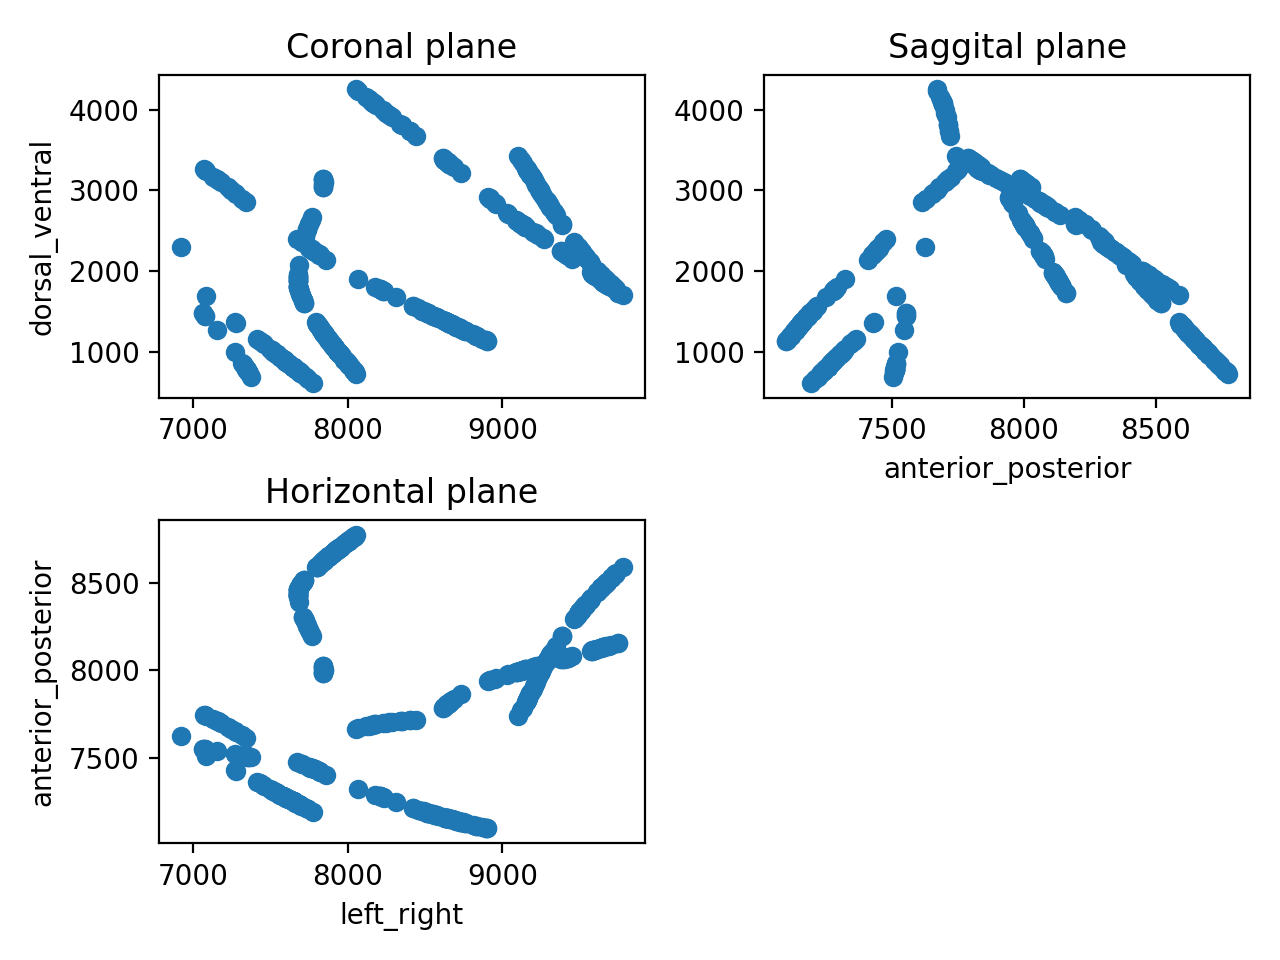

In [49]:
fig, axs = plt.subplots(2, 2)#, sharex='col', sharey='row', gridspec_kw={'wspace': 0})

axs[0,0].plot(session.units['left_right_ccf_coordinate'],session.units['dorsal_ventral_ccf_coordinate'],'o')
axs[0,0].set_ylabel('dorsal_ventral')
axs[0,0].set_title('Coronal plane')

axs[0,1].plot(session.units['anterior_posterior_ccf_coordinate'],session.units['dorsal_ventral_ccf_coordinate'],'o')
axs[0,1].set_xlabel('anterior_posterior')
axs[0,1].set_title('Saggital plane')

axs[1,0].plot(session.units['left_right_ccf_coordinate'],session.units['anterior_posterior_ccf_coordinate'],'o')
axs[1,0].set_xlabel('left_right')
axs[1,0].set_ylabel('anterior_posterior')
axs[1,0].set_title('Horizontal plane')

axs[1,1].axis('off')
plt.tight_layout()


## b) 3D
Plot all three dimensions in a standard 3D scatter plot

<IPython.core.display.Javascript object>


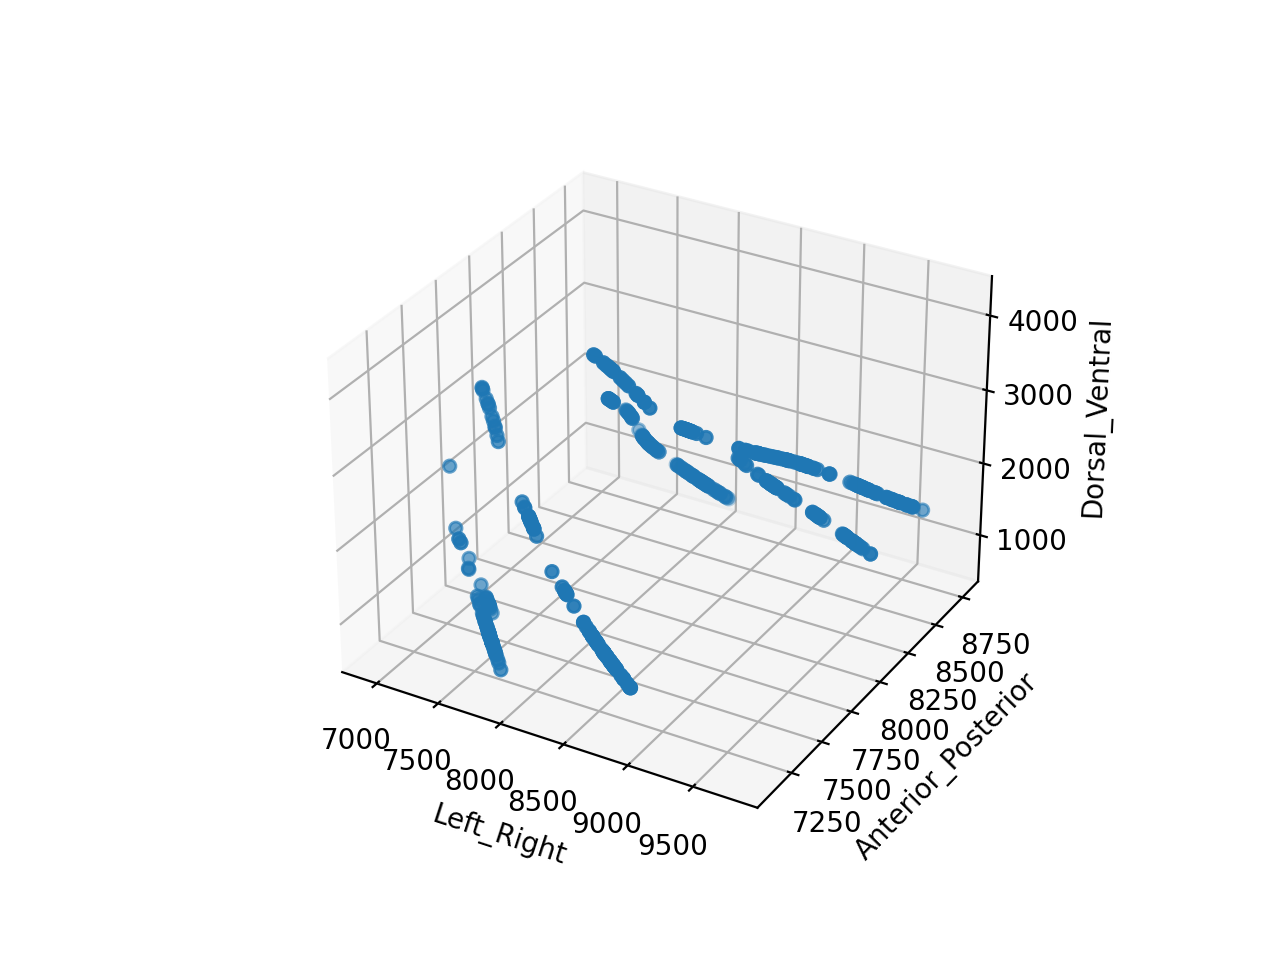

Text(0.5, 0, 'Dorsal_Ventral')

In [58]:
plt.close()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(session.units['left_right_ccf_coordinate'], \
           session.units['anterior_posterior_ccf_coordinate'], \
           session.units['dorsal_ventral_ccf_coordinate'])

ax.set_xlabel('Left_Right')
ax.set_ylabel('Anterior_Posterior')
ax.set_zlabel('Dorsal_Ventral')

## c) 2.5D
Plot two dimensional, but using color **AND** scatter blobs scaled according to third dimension

**OBSOBS! The color/scale dimensional values are transformed (with an engineered function) dynamically to enchance relative percetual difference**

<IPython.core.display.Javascript object>


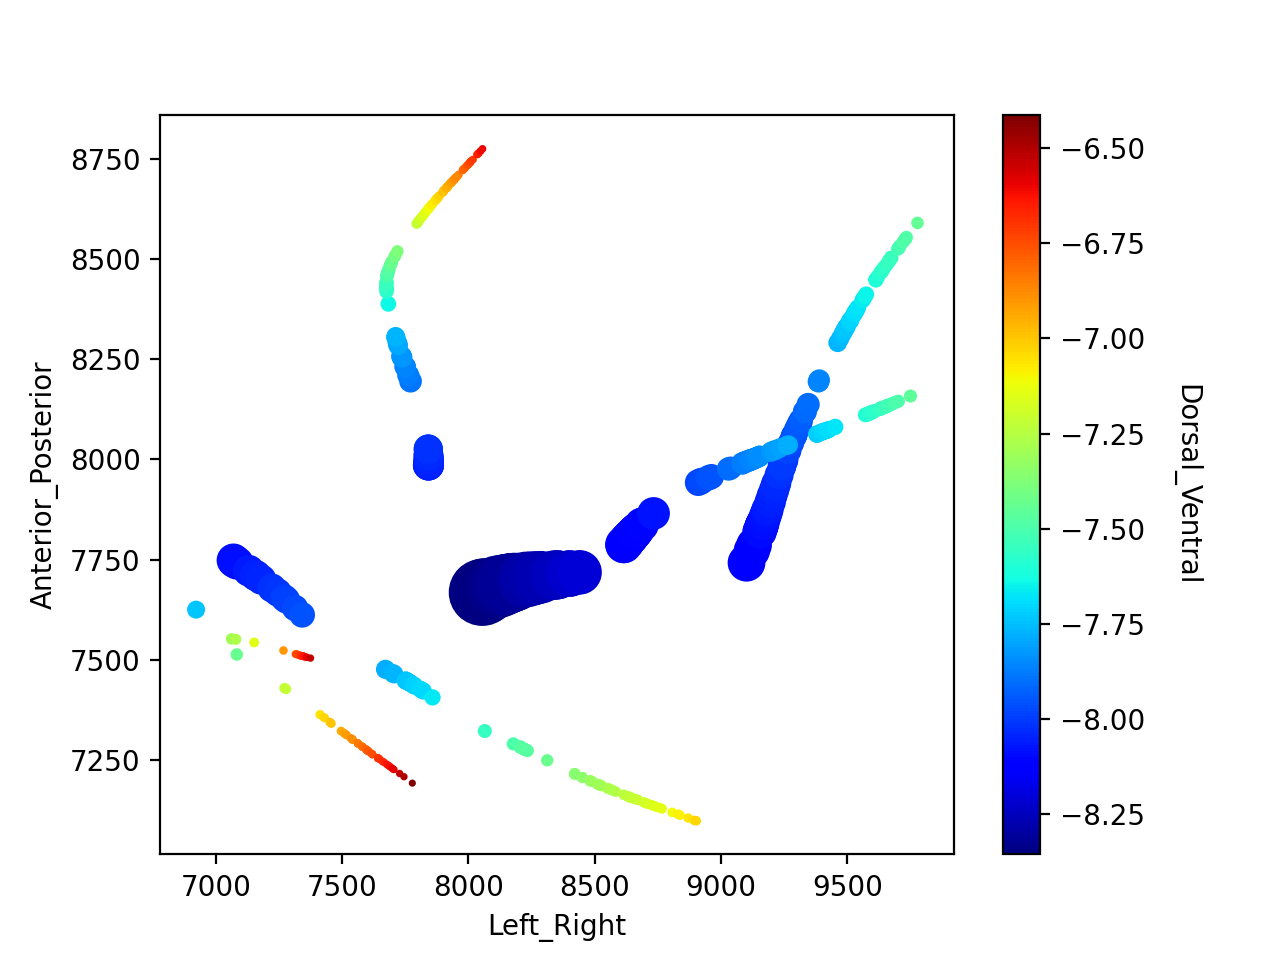

Text(0, 0.5, 'Dorsal_Ventral')

In [59]:
plt.close()
fig = plt.figure()
ax = fig.add_subplot(111)
sc = ax.scatter(x=session.units['left_right_ccf_coordinate'], \
           y=session.units['anterior_posterior_ccf_coordinate'], \
           s=np.exp(session.units['dorsal_ventral_ccf_coordinate']/session.units['dorsal_ventral_ccf_coordinate'].max()*2*np.pi), \
           c=np.log(1/session.units['dorsal_ventral_ccf_coordinate']), \
           cmap='jet')
ax.set_xlabel('Left_Right')
ax.set_ylabel('Anterior_Posterior')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('Dorsal_Ventral', rotation=270, labelpad=20)

In [60]:
def scattera(ax,x,y,s,c,alpha,**kwargs):
    for xi,yi,si,ci,alphai in zip(x,y,s,c,alpha):
        ax.scatter(xi,yi,s=si,c=ci,alpha=alphai,**kwargs)
    return ax

<IPython.core.display.Javascript object>


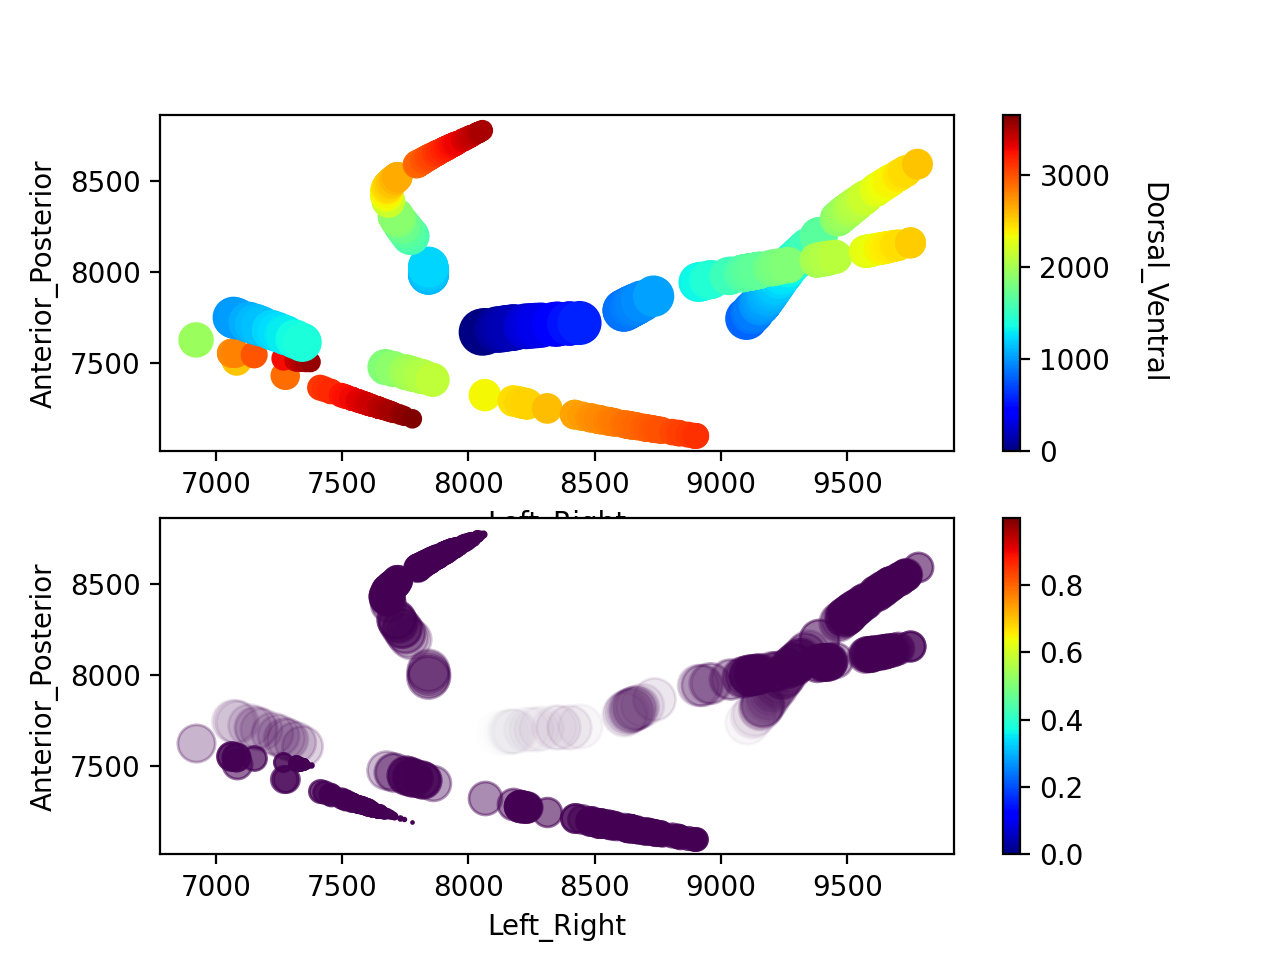

<matplotlib.collections.PathCollection object at 0x7f8a8e9be290> Figure(640x480) [<AxesSubplot:xlabel='Left_Right', ylabel='Anterior_Posterior'>
 <AxesSubplot:>] AxesSubplot(0.125,0.53;0.62x0.35)


Text(0, 0.5, 'Dorsal_Ventral')

In [62]:
plt.close()
fig, axs = plt.subplots(2)#, sharex='col', sharey='row', gridspec_kw={'wspace': 0})

dv = histogram_equalization(session.units['dorsal_ventral_ccf_coordinate'])
sc = axs[0].scatter(x=session.units['left_right_ccf_coordinate'], \
           y=session.units['anterior_posterior_ccf_coordinate'], \
           s=256*session.units['dorsal_ventral_ccf_coordinate']/session.units['dorsal_ventral_ccf_coordinate'].max(), \
           c=session.units['dorsal_ventral_ccf_coordinate'].max() - session.units['dorsal_ventral_ccf_coordinate'], \
           cmap='jet')
axs[0].set_xlabel('Left_Right')
axs[0].set_ylabel('Anterior_Posterior')
cbar = fig.colorbar(sc,ax=axs[0])
cbar.ax.set_ylabel('Dorsal_Ventral', rotation=270, labelpad=20)


print(sc,fig,axs,axs[0])

"""
sc = axs[1].scatter(x=session.units['left_right_ccf_coordinate'], \
           y=session.units['anterior_posterior_ccf_coordinate'], \
           s=dv*256, \
           c=1-dv, \
           cmap='jet')
"""
x,y = session.units['left_right_ccf_coordinate'],session.units['anterior_posterior_ccf_coordinate']
import matplotlib
norm = plt.Normalize(np.min(1-dv), np.max(1-dv))
sm = plt.cm.ScalarMappable(cmap=matplotlib.cm.jet, norm=norm)
axs[1].figure.colorbar(sm)
scattera(axs[1],x,y,s=dv*256,c=1-dv,alpha=1-dv)


axs[1].set_xlabel('Left_Right')
axs[1].set_ylabel('Anterior_Posterior')
#cbar = fig.colorbar(sc,ax=axs[1]) #fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.ax.set_ylabel('Dorsal_Ventral', rotation=270, labelpad=20)

<IPython.core.display.Javascript object>


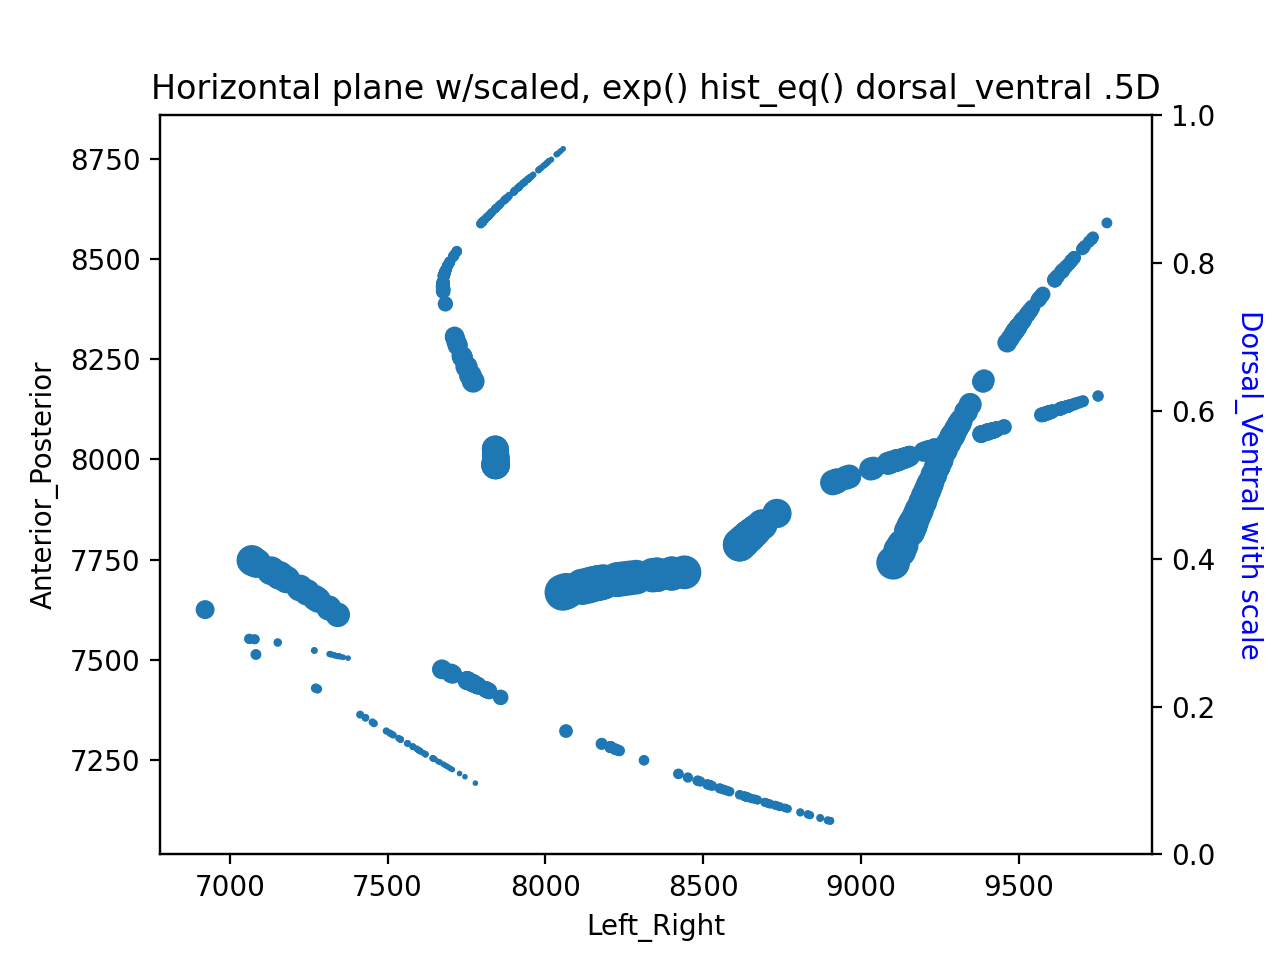

Text(0, 0.5, 'Dorsal_Ventral with scale')

In [57]:
plt.close()
fig, ax = plt.subplots(1)#, sharex='col', sharey='row', gridspec_kw={'wspace': 0})

dv = histogram_equalization(session.units['dorsal_ventral_ccf_coordinate'])
sc = ax.scatter(x=session.units['left_right_ccf_coordinate'], \
           y=session.units['anterior_posterior_ccf_coordinate'], \
           s=np.exp(5*dv))
ax.set_xlabel('Left_Right')
ax.set_ylabel('Anterior_Posterior')
ax.set_title('Horizontal plane w/scaled, exp() hist_eq() dorsal_ventral .5D')
ax.twinx().set_ylabel('Dorsal_Ventral with scale',rotation=270,labelpad=17,color='blue')

# Load and setup: npa and targets
* NPA: neural population activity, aggregated (summed) action potentials across stimulus time
* Targets: integers indicating different natural images

In [10]:
spikes = spikes.groupby(["stimulus_presentation_id", "unit_id"]).count()

design = pd.pivot_table(
    spikes, 
    values='time_since_stimulus_presentation_onset', 
    index="stimulus_presentation_id", 
    columns="unit_id", 
    fill_value=0.0,
    aggfunc=np.sum
)
design

unit_id,951058482,951058595,951058608,951058613,951058664,951058683,951058717,951058722,951058750,951058759,...,951073825,951073889,951073896,951073905,951073920,951073933,951074117,951074135,951074143,951074171
stimulus_presentation_id,,,,,,,,,,,,,,,,,,,,,
51355,1,0,9,11,0,0,14,3,9,11,...,5,12,2,1,0,3,2,0,0,0
51356,6,2,2,2,0,6,7,2,6,7,...,2,5,0,0,0,7,0,0,0,0
51357,11,0,6,1,0,2,10,0,2,2,...,1,4,0,1,0,12,0,2,0,0
51358,6,2,4,3,0,4,8,2,3,8,...,2,6,0,2,0,9,0,4,1,0
51359,5,0,4,3,0,2,7,0,0,3,...,1,1,0,4,1,7,0,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68224,4,3,1,5,0,0,8,0,0,6,...,1,2,1,0,0,13,0,0,0,0
68225,6,2,4,5,0,0,13,0,0,4,...,0,0,0,0,0,11,0,0,2,0
68226,5,2,4,5,0,2,9,0,0,5,...,0,7,0,0,1,8,0,0,0,0


In [33]:
targets = scene_presentations.loc[design.index.values, "frame"]

design_arr = design.values.astype(float)
targets_arr = targets.values.astype(int) + 1 # add +1 since one class is -1 somehow
labels = np.unique(targets_arr)

In [159]:
# choose a class to aggregate neural activity over
class_choice =  100 # 49 is diff
idx = np.where(targets_arr == class_choice) # Each class has been shown -- 50 -- times

# aggregate (here SUM, since we normalize later either way) neural activity for chosen class
class_neural_activity = np.sum(design_arr[idx],axis=0)

# 2(+2)D
* Scale => dorsal_ventral spatial dimension
* Transparency (alpha) => relative spike rate

<IPython.core.display.Javascript object>


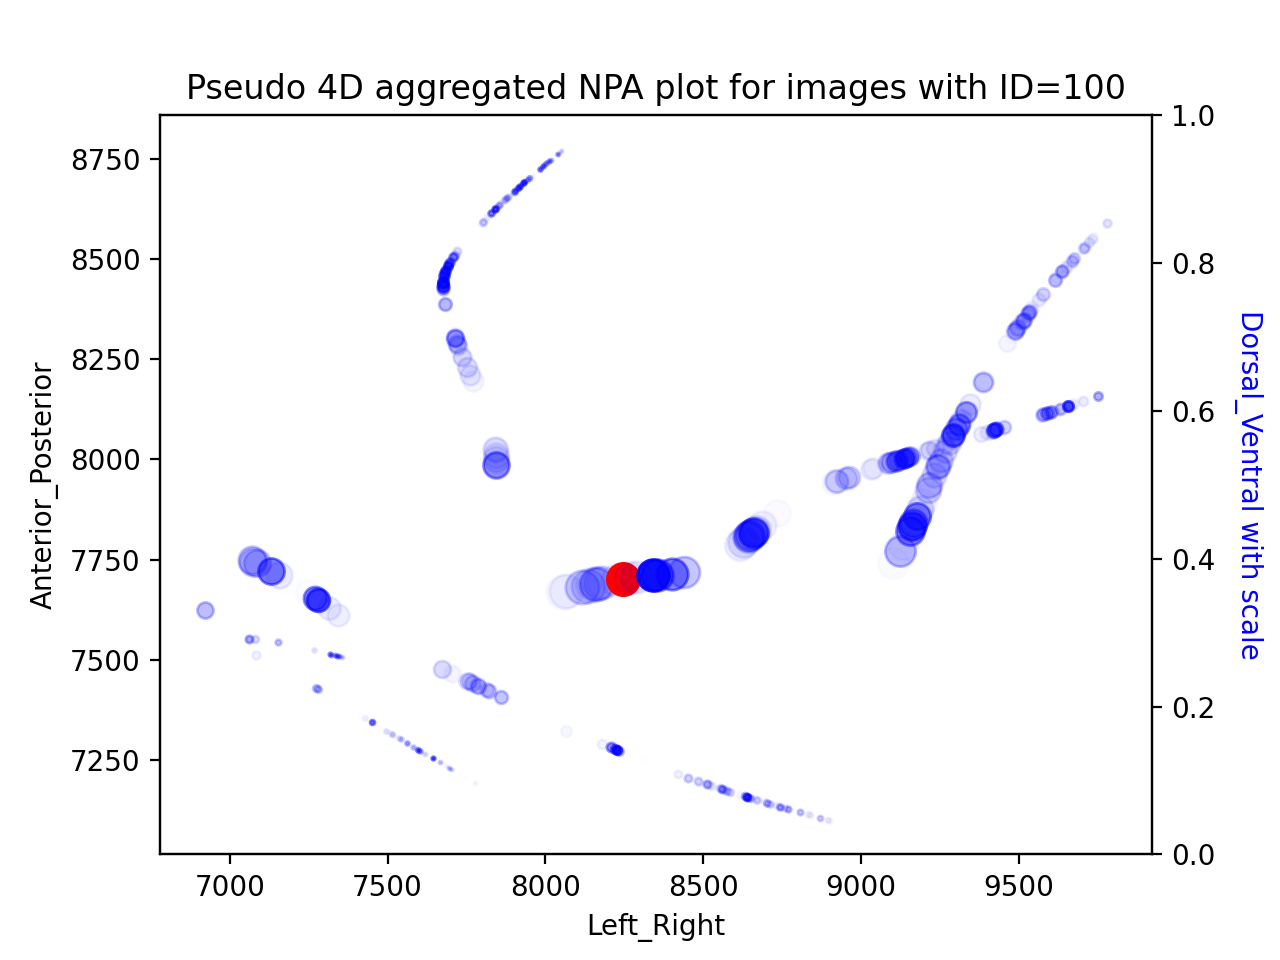

#spikes_max=1021.0, ID=349
#spikes_avg=114.71351351351352, #spikes_std=124.26325911198651


In [160]:
plt.close()
fig, ax = plt.subplots(1)#, sharex='col', sharey='row', gridspec_kw={'wspace': 0})

# orthogonal data
x=session.units['left_right_ccf_coordinate']
y=session.units['anterior_posterior_ccf_coordinate']
dv=histogram_equalization(session.units['dorsal_ventral_ccf_coordinate'])
s=np.exp(5*dv)
c=['blue']*len(x)
alpha=class_neural_activity/np.max(class_neural_activity)
c[np.argmax(alpha)]='red' # color most active neuron red

ax = scattera(ax,x,y,s=s,c=c,alpha=alpha)
ax.set_xlabel('Left_Right')
ax.set_ylabel('Anterior_Posterior')
ax.set_title('Pseudo 4D aggregated NPA plot for images with ID={}'.format(class_choice))
ax.twinx().set_ylabel('Dorsal_Ventral with scale',rotation=270,labelpad=17,color='blue')

# 349 & 352 almost always...?
print('#spikes_max={}, ID={}'.format(class_neural_activity[np.argmax(alpha)],np.argmax(alpha)))
print('#spikes_avg={}, #spikes_std={}'.format(np.mean(class_neural_activity),np.std(class_neural_activity)))

<IPython.core.display.Javascript object>


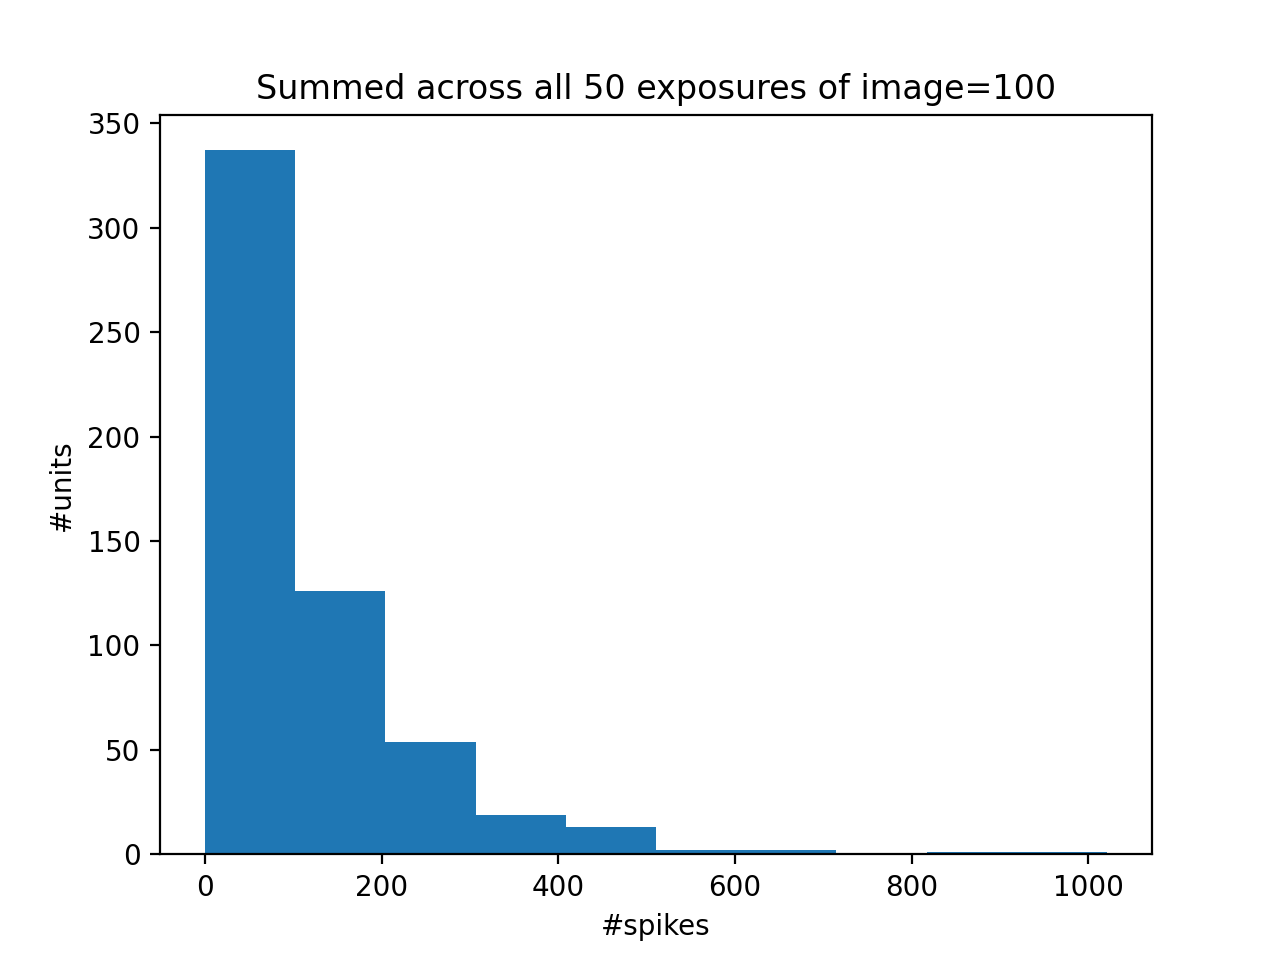

Text(0.5, 1.0, 'Summed across all 50 exposures of image=100')

In [163]:
plt.close()
plt.hist(class_neural_activity)
plt.xlabel('#spikes')
plt.ylabel('#units')
plt.title('Summed across all 50 exposures of image={}'.format(class_choice))

<IPython.core.display.Javascript object>


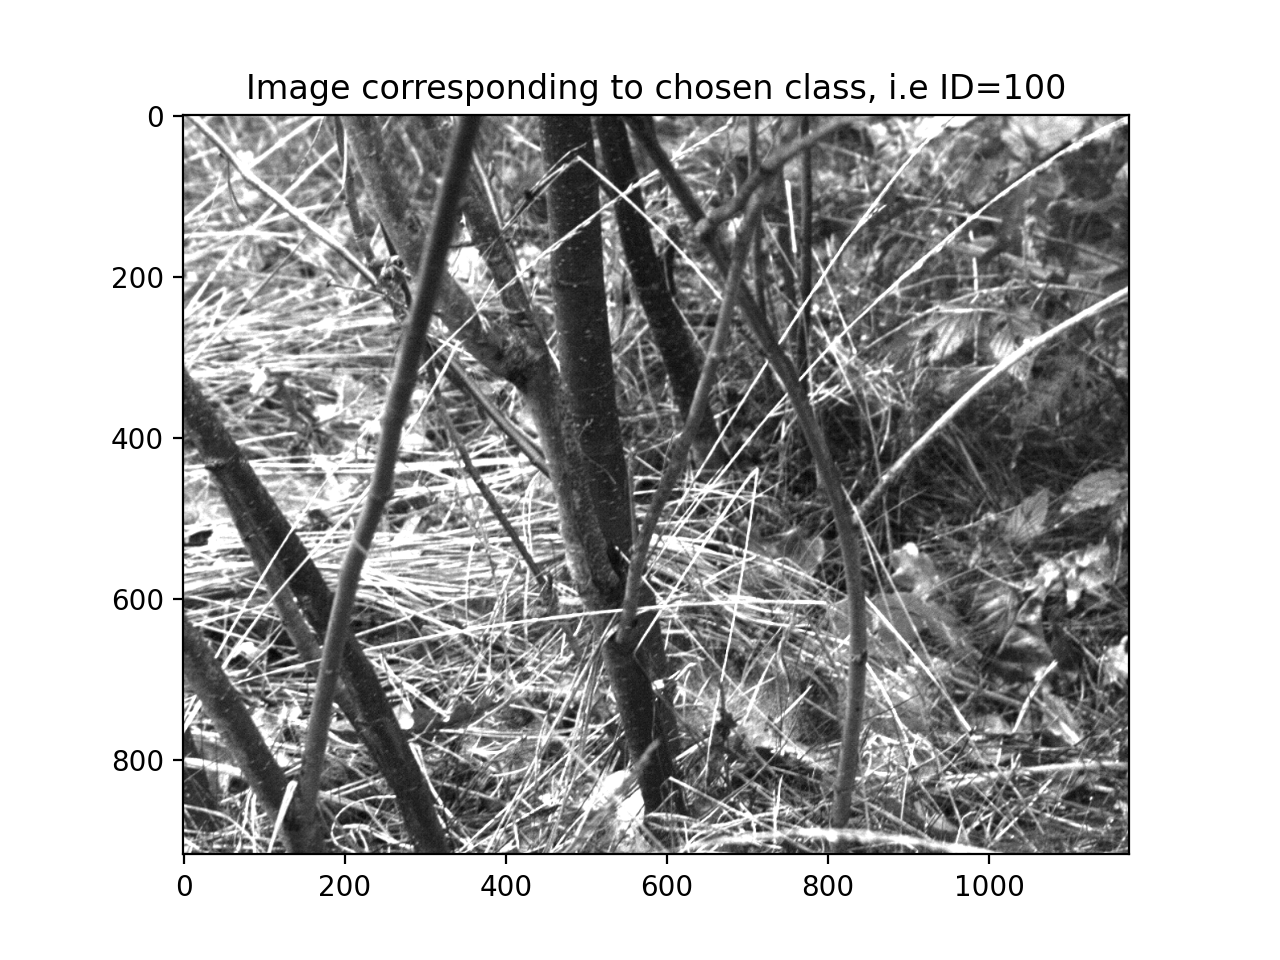

Text(0.5, 1.0, 'Image corresponding to chosen class, i.e ID=100')

In [162]:
plt.close()
fig, ax = plt.subplots(1)

image_choice = cache.get_natural_scene_template(class_choice)
ax.imshow(image_choice, cmap=plt.cm.gray)
ax.set_title("Image corresponding to chosen class, i.e ID={}".format(class_choice))

In [22]:
# preprocess input (standardise)
design_arr -= np.mean(design_arr)
design_arr /= np.std(design_arr)

# lowest target value is -1, shift so that range starts at 0
targets_arr -= np.min(targets_arr)
num_categories = max(targets_arr)+1 # size of NN output

In [ ]:
model = MindReader(num_categories)

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

# Build (by specifying input_shape) and summarize model
mb_size = 32
input_shape = [mb_size,design_arr.shape[-1]]
model.build(input_shape)
model.summary()

In [ ]:
model.fit(x=design_arr,y=targets_arr,batch_size=32,epochs=15,validation_split=0.1,shuffle=True)
print("CHANCE: {}".format(1/labels.size))

In [ ]:
idx = 100
sort_ind = np.argsort(design_arr[idx])

plt.plot(np.arange(design_arr.shape[-1]),design_arr[idx,sort_ind])
plt.xlabel('sorted units')
plt.ylabel('#spikes')
plt.grid('on')
plt.title('#spikes for each unit, sorted. aggregated time/index: {}'.format(idx))
plt.show()

In [ ]:
# reuse selected idx from above
exmp_inp = tf.Variable(design_arr[None,idx], dtype=float)

with tf.GradientTape() as tape:
    pred = model(inputs=exmp_inp,softmax=False)
    score = pred[0,tf.math.argmax(pred[0])]
    
grads = tape.gradient(score, exmp_inp)

In [ ]:
plt.plot(np.arange(design_arr.shape[-1]),np.abs(grads.numpy())[0,sort_ind])
plt.xlabel('sorted units')
plt.ylabel('d(argmax-class)_d(units)')
plt.title('sorted unit importance example')
plt.show()